## Importing Libraries and Loading the Dataset

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

In [54]:
df= pd.read_csv("car_spam.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [55]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [56]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [57]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [58]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [59]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [60]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [61]:
df.shape

(301, 9)



### Visualization

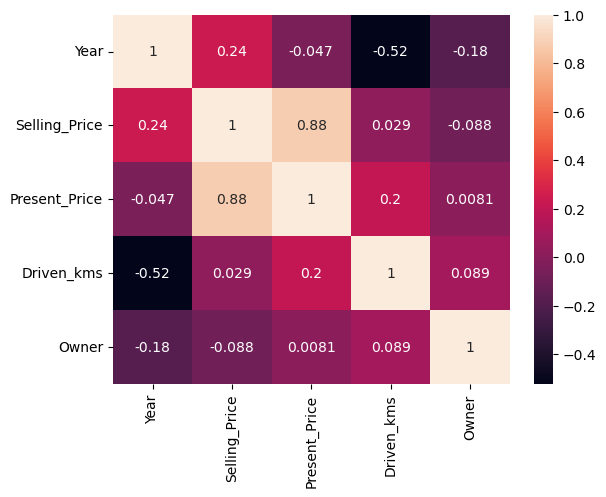

In [62]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

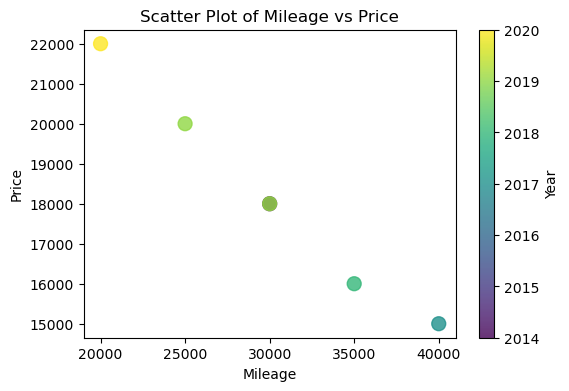

In [100]:
#SCATTER PLOT
car = pd.DataFrame({'Year': [2014, 2019, 2017, 2018, 2020, 2019],'Mileage': [30000, 25000, 40000, 35000, 20000, 30000],'EngineSize': [2.0, 1.5, 1.8, 2.2, 1.6, 2.0],'Price': [18000, 20000, 15000, 16000, 22000, 18000]})
plt.figure(figsize=(6, 4))
plt.scatter(car_data['Mileage'], car_data['Price'], c=car_data['Year'], cmap='viridis', s=100, alpha=0.8)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Scatter Plot of Mileage vs Price')
cbar = plt.colorbar()
cbar.set_label('Year')
plt.show()

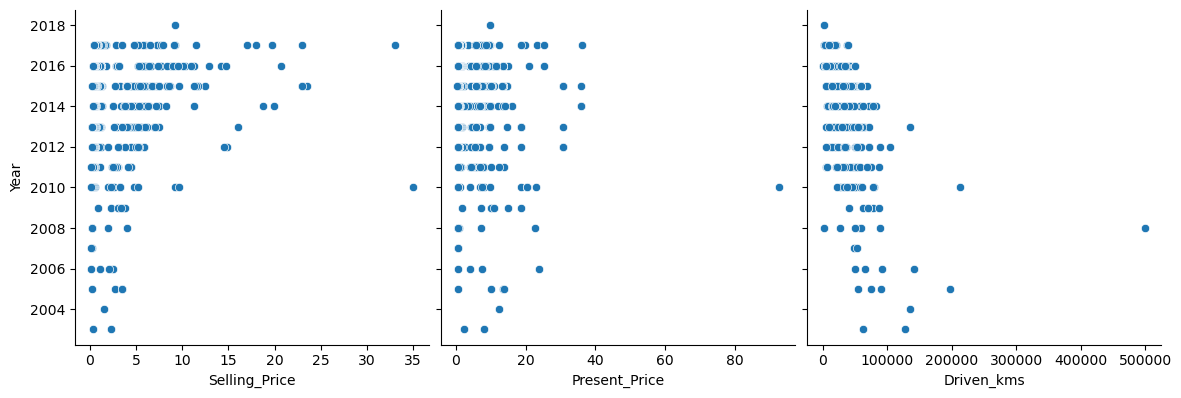

In [64]:
sns.pairplot(df, x_vars=['Selling_Price', 'Present_Price', 'Driven_kms'], y_vars='Year', height=4, aspect=1, kind='scatter')
plt.show()

### Splitting the Dataset into training and testing sets

In [65]:
features = df[['Selling_Price', 'Present_Price']]
target = df['Year']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
slr= LinearRegression()  
slr.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred_slr= slr.predict(X_test)  
X_pred_slr= slr.predict(X_train)  

### Actual value and Predicted Values

In [78]:
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
177,2016,2013.242676
289,2016,2015.191585
228,2012,2013.209323
198,2011,2013.108213
60,2013,2011.293418
...,...,...
234,2015,2014.888976
296,2016,2015.489515
281,2006,2011.930460
285,2016,2015.175117


### Multiple Regression
###### Instance of Linear Regression

In [70]:
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred_mlr= mlr.predict(X_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [2013.24267621 2015.19158547 2013.20932273 2013.10821293 2011.2934185
 2015.06004398 2013.42829425 2013.23377704 2013.32052849 2013.72054318
 2015.94805402 2013.42829425 2013.98911306 2013.29753331 2014.0161024
 2013.2596315  2013.2283208  2018.0395776  2013.34069798 2013.7077766
 2013.23309493 2015.49519846 2013.47824929 2013.4595401  2013.26206632
 2013.32653889 2013.06592785 2012.96933396 2013.49552589 2013.48490525
 2013.36754848 2013.79946842 2013.17537972 2011.98892168 2014.59971889
 2013.18496276 2011.7098638  2009.17562186 2013.59764087 2009.83910393
 2010.71889514 2009.84546807 2013.96884453 2013.20477322 2014.53109004
 2013.18772183 2012.59644419 2008.65651036 2014.26992483 2012.88953323
 2013.31689335 2013.59637335 2016.27798366 2019.68383157 2015.42796682
 2015.72271542 2014.88897589 2015.48951525 2011.93045951 2015.17511714
 2013.20552017]


In [81]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
slr_diff.head()

,Actual value,Predicted value
177,2016,2013.242676
289,2016,2015.191585
228,2012,2013.209323
198,2011,2013.108213
60,2013,2011.293418


### Decision Tree Classifier 

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [95]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### Accuracy of the model

In [96]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.22950819672131148


### Classification model

In [97]:
y_pred = classifier.predict(X_test)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        2004       0.00      0.00      0.00         1
        2005       0.50      1.00      0.67         1
        2006       0.00      0.00      0.00         1
        2008       0.00      0.00      0.00         1
        2009       0.00      0.00      0.00         1
        2010       0.00      0.00      0.00         3
        2011       0.25      0.33      0.29         3
        2012       0.00      0.00      0.00         5
        2013       0.38      0.23      0.29        13
        2014       0.00      0.00      0.00         9
        2015       0.17      0.33      0.22         6
        2016       0.42      0.56      0.48         9
        2017       0.29      0.29      0.29         7
        2018       0.00      0.00      0.00         1

    accuracy                           0.23        61
   macro avg       0.14      0.20      0.16        61
weighted avg       0.21      0.23      0.21        61



C:\Users\GAJANAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\GAJANAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\GAJANAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

